<img src="kaggle.png">

Соревнование https://www.kaggle.com/c/property-prices-2

In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from IPython.display import HTML
from typing import Dict, Any
from hyperopt import (
    fmin,
    hp,
    tpe,
    STATUS_OK
)

%matplotlib inline

## Пример решения

In [63]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

train = train.replace(np.nan, -999)
#train = train.dropna(np.nan, -999)
test = test.replace(np.nan, -999)

In [64]:
#COLUMNS = ['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13']

COLUMNS = ['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon', 'metro_dist', 'g_lift']

In [65]:
y = train['price'].values
X = train[COLUMNS].values
Xt = test[COLUMNS].values

In [66]:
min_max_scaler = MinMaxScaler()
#X = min_max_scaler.fit_transform(X)
#Xt = min_max_scaler.fit_transform(Xt)

In [67]:
train.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,121,1.0,3,52,2,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,3090000
1,1,2011-1,58,1.0,6,101,3,1,5.0,-999.0,...,0,0,0,0,0,0,0,0,0,15372000
2,2,2011-1,530,0.0,11,71,3,0,30.0,-999.0,...,0,0,0,0,0,0,0,0,0,10067000
3,3,2011-1,448,-999.0,5,36,1,1,15.0,0.0,...,0,0,0,0,0,0,0,0,0,3159000
4,4,2011-1,404,2.0,3,215,6,2,20.0,1.0,...,0,0,0,0,0,0,0,0,0,13816000


In [68]:
#train.describe()

In [69]:
#train.info()

In [70]:
train.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,121,1.0,3,52,2,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,3090000
1,1,2011-1,58,1.0,6,101,3,1,5.0,-999.0,...,0,0,0,0,0,0,0,0,0,15372000
2,2,2011-1,530,0.0,11,71,3,0,30.0,-999.0,...,0,0,0,0,0,0,0,0,0,10067000
3,3,2011-1,448,-999.0,5,36,1,1,15.0,0.0,...,0,0,0,0,0,0,0,0,0,3159000
4,4,2011-1,404,2.0,3,215,6,2,20.0,1.0,...,0,0,0,0,0,0,0,0,0,13816000


In [71]:
#train2=train.groupby('area').std()
#test2=region_groupby.aggregate(np.mean)
#train2.drop(u'id')


#COLUMNS2 = ['street_id', 'build_tech', 'floor', 'rooms', 'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13']
#COLUMNS2 = ['street_id', 'build_tech', 'floor', 'rooms', 'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3']
#X = train2[COLUMNS2].values

In [72]:
#train2.head()

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=55)

In [74]:
#mdl = sklearn.ensemble.RandomForestRegressor(max_features='auto', max_depth=83, n_estimators=42, max_leaf_nodes=10000)
#mdl = sklearn.ensemble.RandomForestRegressor(max_depth=83, n_estimators=46)

#mdl = sklearn.ensemble.RandomForestRegressor(criterion='mae')
#mdl = sklearn.ensemble.RandomForestRegressor()

mdl = xgb.XGBRegressor(max_depth=12, learning_rate = 0.1)

#mdl = xgb.XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=5, nthread=4)

mdl.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=12, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
preds = mdl.predict(X_test)

#test['price'] = preds

#test[['id', 'price']].to_csv('sub.csv', index=False)

In [76]:
mean_absolute_error(y_pred=preds, y_true=y_test)

np.float64(1553247.58278125)

In [77]:
f_preds = mdl.predict(Xt)

test['price'] = f_preds

test[['id', 'price']].to_csv('sub.csv', index=False)

In [78]:
metric =[]
for n_trees in range(1,20):
    #mdl = sklearn.ensemble.RandomForestRegressor(max_depth=n_trees)
    mdl = xgb.XGBRegressor(max_depth=n_trees, learning_rate = 0.1)
    mdl.fit(X_train, y_train)
    preds = mdl.predict(X_test)
    metric.append(mean_absolute_error(y_pred=preds, y_true=y_test))
    

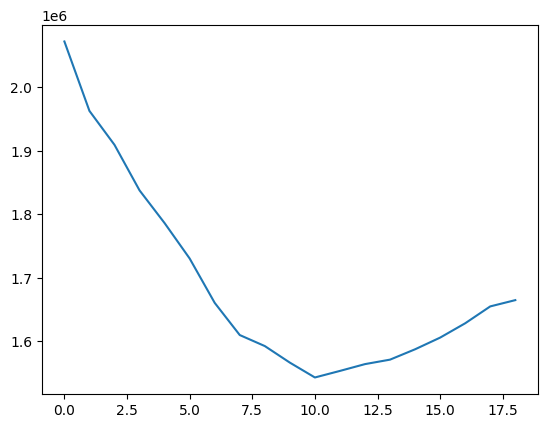

In [79]:
plt.plot(metric[:100])
plt.show()

# Решение

### Данные

In [92]:
df = pd.read_csv('Train.csv')

df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,121,1.0,3,52,2,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,3090000
1,1,2011-1,58,1.0,6,101,3,1,5.0,NaN,...,0,0,0,0,0,0,0,0,0,15372000
2,2,2011-1,530,0.0,11,71,3,0,30.0,NaN,...,0,0,0,0,0,0,0,0,0,10067000
3,3,2011-1,448,NaN,5,36,1,1,15.0,0.0,...,0,0,0,0,0,0,0,0,0,3159000
4,4,2011-1,404,2.0,3,215,6,2,20.0,1.0,...,0,0,0,0,0,0,0,0,0,13816000


In [93]:
df.columns

Index(['id', 'date', 'street_id', 'build_tech', 'floor', 'area', 'rooms',
       'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3',
       'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12',
       'kw13', 'price'],
      dtype='object')

In [94]:
df.describe()

,id,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,n_photos,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
count,100000.000000,100000.000000,69896.000000,100000.000000,100000.000000,100000.00000,100000.000000,95047.000000,69943.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,49999.500000,334.506830,0.539015,5.280490,52.108100,2.11278,0.402810,21.799846,0.497762,2.480110,...,0.004090,0.001460,0.000650,0.00801,0.008320,0.001800,0.000290,0.001420,0.000220,5.329125e+06
std,28867.657797,194.178711,0.578554,3.947259,17.433424,0.82522,0.550869,8.342282,0.499999,1.945282,...,0.063823,0.038182,0.025487,0.08914,0.090834,0.042388,0.017027,0.037656,0.014831,4.669177e+06
min,0.000000,0.000000,0.000000,1.000000,29.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.940000e+05
25%,24999.750000,165.000000,0.000000,2.000000,40.000000,1.00000,0.000000,15.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,2.673000e+06
50%,49999.500000,334.000000,0.000000,4.000000,52.000000,2.00000,0.000000,25.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.169500e+06
75%,74999.250000,503.000000,1.000000,7.000000,60.000000,3.00000,1.000000,30.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,6.414000e+06
max,99999.000000,671.000000,2.000000,25.000000,217.000000,6.00000,2.000000,30.000000,1.000000,11.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.104980e+08


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          100000 non-null  int64  
 1   date        100000 non-null  object 
 2   street_id   100000 non-null  int64  
 3   build_tech  69896 non-null   float64
 4   floor       100000 non-null  int64  
 5   area        100000 non-null  int64  
 6   rooms       100000 non-null  int64  
 7   balcon      100000 non-null  int64  
 8   metro_dist  95047 non-null   float64
 9   g_lift      69943 non-null   float64
 10  n_photos    100000 non-null  int64  
 11  kw1         100000 non-null  int64  
 12  kw2         100000 non-null  int64  
 13  kw3         100000 non-null  int64  
 14  kw4         100000 non-null  int64  
 15  kw5         100000 non-null  int64  
 16  kw6         100000 non-null  int64  
 17  kw7         100000 non-null  int64  
 18  kw8         100000 non-null  int64  
 19  kw9

In [96]:
target = 'price'
fetures = [
    *df.columns[~df.columns.isin(['price', 'id', 'date'])],
    'day',
    'month'
]

In [97]:
def preprocess(df: pd.DataFrame) -> pd.DataFrame:
    df['g_lift'] = df['g_lift'].fillna(0)
    df['g_lift'] = df['g_lift'].astype(int)

    mapping = df[['street_id', 'price']].groupby('street_id').agg('mean').to_dict()['price']
    df['street_id'] = df['street_id'].apply(lambda e: mapping[e])

    df['date'] = pd.to_datetime(df['date'])

    df['day'] = df['date'].dt.day_of_week
    df['month'] = df['date'].dt.month
    
    return df

In [98]:
df = preprocess(df)

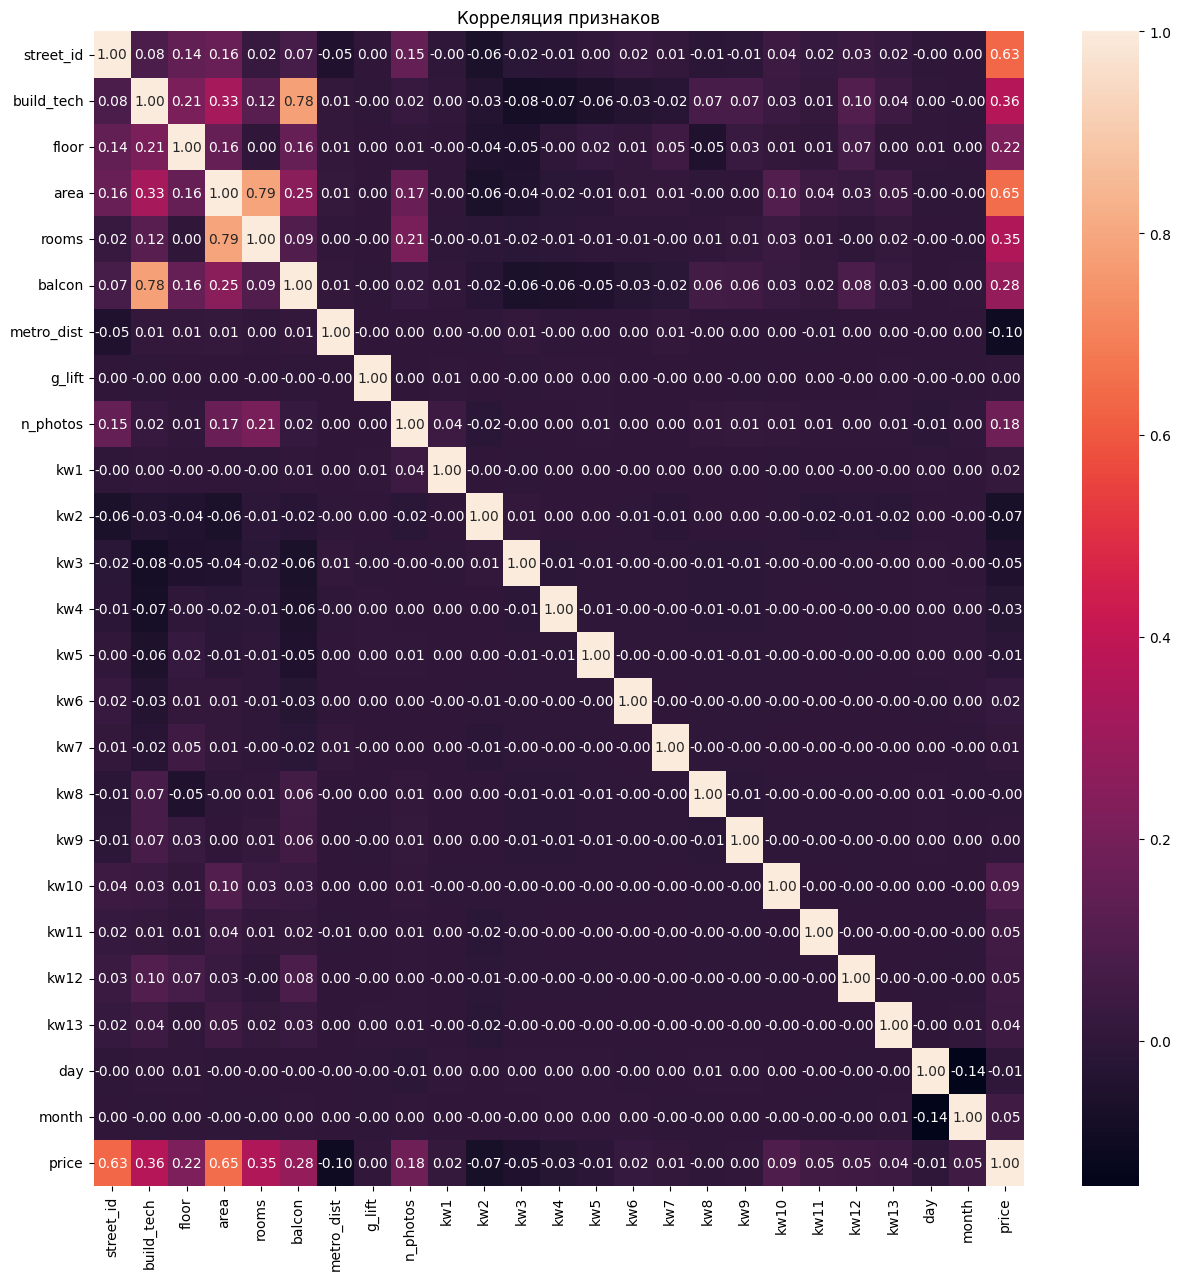

In [100]:
corr_matrix = df[fetures + [target]].corr()

plt.figure(figsize=(15, 15))
plt.title('Корреляция признаков')

sns.heatmap(corr_matrix, annot=True, fmt='.2f')

plt.show()

In [101]:
train_df, test_df = train_test_split(df, test_size=0.1)

### Model

In [102]:
def objecive(space):
    model = xgb.XGBRegressor(
        **space
    )
    model.fit(train_df[fetures].values, train_df[target].values)
    preds = model.predict(test_df[fetures].values)
    return {
        'loss': mean_absolute_error(y_pred=preds, y_true=test_df[target].values), # type: ignore
        'status': STATUS_OK
    }

In [103]:
search_space = {
    'n_estimators': hp.randint('n_estimators', 100, 1000),
    'max_depth': hp.randint('max_depth', 1, 20),
    'learning_rate': hp.uniform('learning_rate', 1e-2, 1)
}

best_params: Dict[Any, Any] = fmin(
    fn=objecive,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100
) # type: ignore

100%|██████████| 100/100 [11:25<00:00,  6.85s/trial, best loss: 834688.982053125]


In [107]:
best_params

{'learning_rate': np.float64(0.20915636034403395),
 'max_depth': np.int64(5),
 'n_estimators': np.int64(496)}

In [104]:
model = xgb.XGBRegressor(
    **best_params
)
model.fit(train_df[fetures].values, train_df[target].values)
preds = model.predict(test_df[fetures].values)

### Valid

In [105]:
def checkTask(preds: np.ndarray, trues: np.ndarray, target=850e+3):
    loss = mean_absolute_error(y_true=trues, y_pred=preds)
    if loss < target:
        display(HTML(f'<h2>Тест пройден. MAE - {loss:.0f}</h2>'))
    else:
        display(HTML(f'<h2>Уменьшить ошибку! MAE - {loss:.0f}, Разница с целевой - {target - loss}</h2>'))

In [106]:
checkTask(preds, test_df[target].values) # type: ignore